In [6]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install SciPy

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Parag\\anaconda3\\ANACONDA\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.




     ---------------------------------------- 14.9/14.9 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [5]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
IMAGE_SIZE = [224, 224]

train_path = r'train'
test_path = r'test'
val_path = r'val'

In [7]:
rn = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

get_available_gpus()

from tensorflow.python.client import device_lib

In [9]:
for layer in rn.layers:
    layer.trainable = False
    
folders = glob(train_path+'\*')

In [10]:
x = Flatten()(rn.output)

In [11]:
prediction = Dense(10, activation='softmax')(x)
model = Model(inputs=rn.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(directory=train_path,
                target_size = (224,224),
                batch_size = 64,
                class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(directory=test_path,
                target_size = (224,224),
                batch_size = 64,
                class_mode = 'categorical', shuffle=False)
val_set = val_datagen.flow_from_directory(directory=val_path,
                target_size = (224,224),
                batch_size = 64,
                class_mode = 'categorical', shuffle=False)

Found 9600 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.


In [14]:
import keras
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=["acc"]
)

In [15]:
import time 
print(time.ctime())
from time import time
t_start = time()

Fri Mar  1 08:54:33 2024


In [16]:
import keras
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

annealer = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-4)
checkpoint = ModelCheckpoint('/temp/{epoch}_VGG19.h5', verbose=1, save_best_only=False, mode='auto', save_freq='epoch')

In [17]:
history = model.fit(
                  training_set,
                  validation_data=val_set,
                  epochs=5,
                  batch_size=128,
                  callbacks=[annealer, checkpoint],
                  steps_per_epoch=len(training_set),
                  validation_steps=len(test_set)
                )

Epoch 1/5


150/150 [==============================] - ETA: 0s - loss: 0.9472 - acc: 0.7154 WARNING:tensorflow:Learning rate reduction is conditioned on metric `accuracy` which is not available. Available metrics are: loss,acc,val_loss,val_acc,lr

Epoch 1: saving model to /temp\1_VGG19.h5


C:\Users\Parag\anaconda3\ANACONDA\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


150/150 [==============================] - 5443s 36s/step - loss: 0.9472 - acc: 0.7154 - val_loss: 0.4210 - val_acc: 0.9025 - lr: 0.0010
Epoch 2/5
150/150 [==============================] - ETA: 0s - loss: 0.2514 - acc: 0.9545 WARNING:tensorflow:Learning rate reduction is conditioned on metric `accuracy` which is not available. Available metrics are: loss,acc,val_loss,val_acc,lr

Epoch 2: saving model to /temp\2_VGG19.h5
150/150 [==============================] - 5373s 36s/step - loss: 0.2514 - acc: 0.9545 - val_loss: 0.2344 - val_acc: 0.9542 - lr: 0.0010
Epoch 3/5
150/150 [==============================] - ETA: 0s - loss: 0.1338 - acc: 0.9804 WARNING:tensorflow:Learning rate reduction is conditioned on metric `accuracy` which is not available. Available metrics are: loss,acc,val_loss,val_acc,lr

Epoch 3: saving model to /temp\3_VGG19.h5
150/150 [==============================] - 5454s 36s/step - loss: 0.1338 - acc: 0.9804 - val_loss: 0.1693 - val_acc: 0.9683 - lr: 0.0010
Epoch 4/5
150

In [18]:
   #time.ctime()
train_time = time() - t_start
print('\nTrain time: %.3f'%(train_time/60), ' mins')


Train time: 506.444  mins


In [19]:
model.save("VGG19-Final.h5")
print("Model Saved as : VGG19-Final.h5")

import json
np.save('my_history.npy',history.history)
import pandas as pd

# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)


Model Saved as : VGG19-Final.h5


In [20]:
from time import time
start = time()
evl = model.evaluate(test_set)
test_time = time() - start

test_loss, test_acc = evl[0]*100, evl[1]*100

msg = f'Test Accuracy = {test_acc:5.2f} %'
msg1 = f'Test Loss = {test_loss:5.2f} %'
msg2 = f'Test Time = {test_time:5.2f} s'
print(msg)
print(msg1)
print(msg2)

19/19 [==============================] - 1408s 57s/step - loss: 0.1050 - acc: 0.9783
Test Accuracy = 97.83 %
Test Loss = 10.50 %
Test Time = 1516.07 s


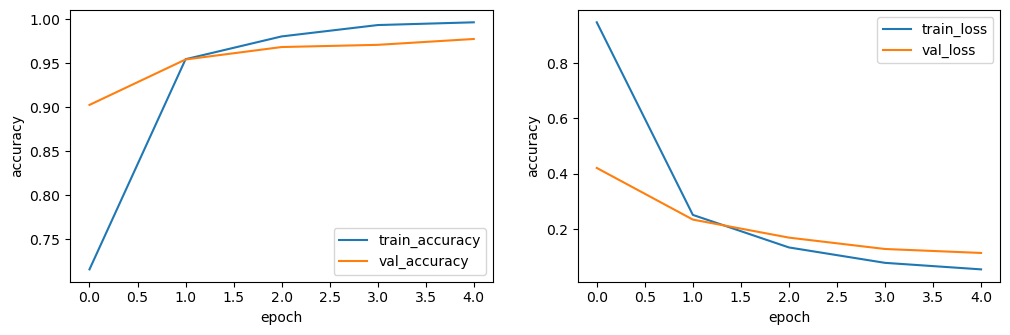

In [21]:
# Plotting Loss & Accuracy Graphs
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.plot(history.history['acc'], label = 'train_accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(3, 2, 2)
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [22]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

True :  [0 0 0 ... 9 9 9]
19/19 [==============================] - 1109s 44s/step
Predicted :  [0 0 0 ... 9 9 9]


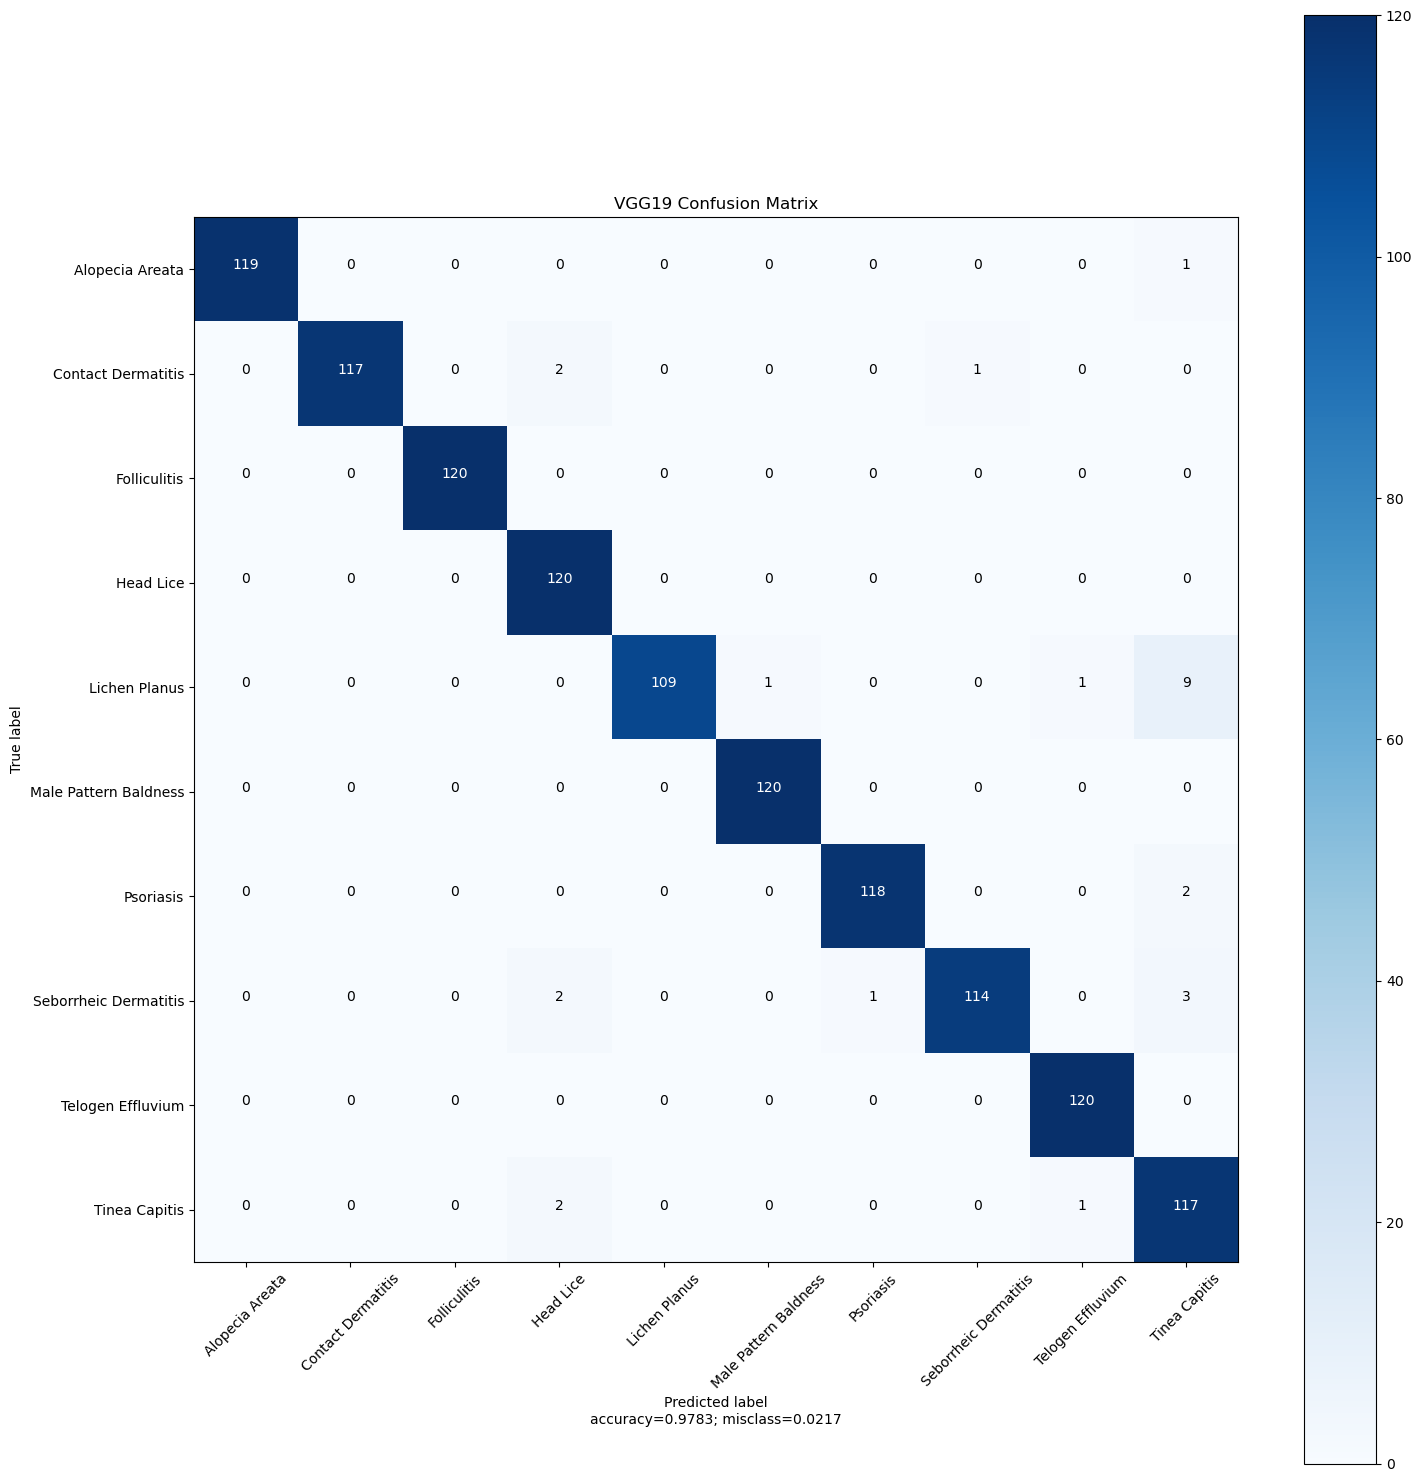

In [23]:
from sklearn.metrics import confusion_matrix

classes = ['Alopecia Areata', 'Contact Dermatitis', 'Folliculitis', 'Head Lice', 'Lichen Planus', 'Male Pattern Baldness', 'Psoriasis', 'Seborrheic Dermatitis', 'Telogen Effluvium', 'Tinea Capitis']

y_true = np.array(test_set.labels)
print("True : ", y_true)

y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
print("Predicted : ", y_pred)

conf_mat = confusion_matrix(y_true, y_pred)

plot_confusion_matrix(cm           = conf_mat,
                      normalize    = False,
                      target_names = classes,
                      title        = "VGG19 Confusion Matrix")